# Problem Statement

to predict labels for the testing data

# 1- Import key Modules

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# For processing
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [4]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# To evaluate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
# testing GPU on colab
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# 2-Loading and preparing data

In [15]:
data_xtrain=pd.read_csv('train_data.csv', header = None)
data_xtrain.shape

(3750, 10000)

In [16]:
data_xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-241.198,-168.099,45470.273,30424.020,-5874.327,1013.082,918.979,184.197,51.221,112.268,-244.399,-457.158,869.094,-517.994,-291.329,-196.154,-167.077,-27.816,437.217,123.120,-384.783,-71.243,-91.678,1363.318,625.675,44.392,-365.473,119.070,419.734,593.822,375.660,1088.867,-1944.261,1069.427,28.277,-380.301,-364.577,87.772,31.810,25.527,...,-72.293,-485.257,547.978,899.011,-186.202,199.484,-705.381,-382.742,673.784,-86.990,-308.528,-636.889,-150.116,66.660,-240.948,405.780,-602.900,772.982,102.457,304.334,-694.879,877.912,26.977,268.859,-547.718,132.609,669.752,153.452,562.652,466.914,876.613,-274.944,161.189,104.710,-280.935,142.168,286.835,-1104.100,442.708,-443.516
1,228.546,289.306,66640.366,-22066.452,-5081.047,-553.859,54.748,-259.886,700.059,-224.882,-833.846,-5.134,-340.258,-549.360,-1231.971,-1406.476,314.254,71.723,259.902,-613.858,202.889,99.320,624.450,-585.048,-871.761,-378.382,-587.081,69.833,-58.610,-189.162,821.744,335.268,1202.380,490.959,47.437,-157.055,121.950,-1161.531,240.342,534.563,...,-502.342,44.742,492.836,17.423,296.432,431.845,354.484,41.753,-620.726,-150.793,154.983,-380.307,213.491,71.547,1124.721,21.715,-139.252,-1993.349,564.371,162.329,-204.679,-839.953,-46.967,681.524,445.038,-343.589,-328.525,381.987,-52.655,680.458,-876.383,-131.391,-48.409,-871.772,359.426,180.664,-440.039,-389.094,-112.745,783.364
2,128.574,276.969,19999.039,3833.398,5521.201,482.558,150.099,543.915,485.702,-237.148,-266.686,244.143,-19.762,745.768,-48.414,824.685,-197.186,-452.131,54.208,-500.395,-143.254,-59.577,-170.962,1032.484,422.922,-424.877,42.568,265.905,12.464,717.593,698.722,-125.546,-136.519,-19.501,214.881,292.913,-172.943,-834.864,177.320,-185.246,...,182.999,-0.198,-434.778,-803.558,374.920,214.181,-331.462,348.973,-41.899,202.775,619.388,-939.192,-1164.311,583.168,-16.773,227.725,-13.186,1296.095,-315.042,-517.854,-351.766,-1.725,5.475,91.896,-126.459,505.028,-275.899,-127.695,-264.891,-854.654,1142.136,-27.107,58.940,-1093.859,-912.443,350.579,374.715,206.126,1344.780,475.398
3,-6.458,54.470,18806.522,11277.931,-60341.532,-315.243,-214.489,45.202,-22.297,-185.386,80.745,-467.267,9.579,-761.308,362.520,-631.227,-62.471,279.298,-50.690,395.598,-42.359,132.386,-340.861,14.366,930.948,464.484,712.147,-614.320,-142.757,-286.561,-12.298,19.390,-961.761,-462.679,-29.975,-805.047,-653.311,776.557,-211.997,99.035,...,767.449,158.939,385.056,-1133.030,479.352,-468.293,-550.776,-521.635,-316.169,-294.841,162.121,571.599,1528.905,315.277,574.421,-244.816,319.820,1733.410,-143.594,-126.256,-776.705,-492.850,-46.931,514.795,333.280,111.545,-414.365,-1541.874,452.893,1214.040,-660.190,257.320,-104.424,-1183.014,1012.996,157.763,87.025,-924.071,-1295.756,1047.525
4,161.241,-656.679,-100408.696,-81928.635,27426.780,-510.462,1131.959,-238.869,-253.697,96.306,638.759,-1198.249,191.493,-742.757,-1189.571,1000.301,-660.766,-352.509,317.120,199.280,-308.604,-17.155,-1057.989,-108.676,153.674,-382.000,877.420,-464.820,-111.868,943.200,-621.364,-154.404,241.940,-190.704,382.622,-419.349,-456.030,-279.778,-102.933,532.824,...,-140.069,184.970,536.073,-313.084,-43.836,-528.367,286.620,385.338,-1006.553,164.166,-113.657,797.984,-397.638,-34.249,91.596,-269.991,51.925,-1047.156,-403.573,-175.156,-517.952,943.573,385.754,-270.242,187.314,463.255,-146.799,-544.981,124.936,-105.039,-1904.939,-98.083,-94.512,2215.710,476.187,-594.739,-137.546,547.996,-133.822,-937.346


Checking if there is a timestamp

In [17]:
#import datetime
#data_xtrain.date = pd.to_datetime(data_xtrain.date)
#if (data_xtrain.date == pd.Timestamp("2010-03-01 00:00:00")).any():
#    print ('timestamp exists in columns')

In [7]:
data_xtest=pd.read_csv('test_data.csv')
data_xtest.shape

(1249, 10000)

In [8]:
data_ytrain=pd.read_csv('train_labels.csv',header = None)
data_ytrain.columns = ["labels"]
data_ytrain.shape

(3750, 1)

In [9]:
data_ytrain.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [10]:
# replace -1 with 0. I like it more
data_ytrain = data_ytrain.replace(-1, 0)

In [11]:
data_ytrain.labels.value_counts()

1    3372
0     378
Name: labels, dtype: int64

In [12]:
data_ytrain.labels.value_counts(normalize=True)

1    0.8992
0    0.1008
Name: labels, dtype: float64

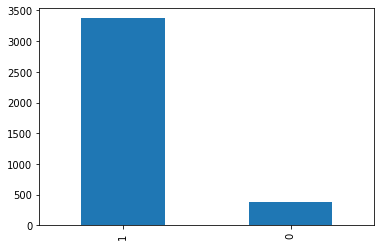

In [13]:
data_ytrain['labels'].value_counts().plot(kind='bar')

**There is a class imbalance. It will be challenging to create a model that will do as good prediction for class 0 as for class 1. Since class 1 has frequency of almost 90%.**

In [14]:
y=data_ytrain.labels
y.shape

(3750,)

# 3)-Preprocessing Data
-  Cleaning
-  Transformation
-  Reduction by PCA

### 3.1 Cleaning 

checking null values

In [18]:
data_xtrain.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [19]:
# Checking rows now
#check if any NaN values
data_xtrain.isnull().values.any()

False

In [20]:
data_ytrain.isnull().values.any()

False

In [21]:
data_xtest.isnull().values.any()

False

### 3.2)-Transformation
Normalize data

In [22]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data_xtrain) 

In [23]:
X.shape

(3750, 10000)

In [24]:
type(X)

numpy.ndarray

In [25]:
np.mean(X),np.std(X)

(7.579122514774402e-22, 1.0000000000000009)

In [26]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]

In [27]:
normalised_X = pd.DataFrame(X,columns=feat_cols)

In [28]:
normalised_X.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature9960,feature9961,feature9962,feature9963,feature9964,feature9965,feature9966,feature9967,feature9968,feature9969,feature9970,feature9971,feature9972,feature9973,feature9974,feature9975,feature9976,feature9977,feature9978,feature9979,feature9980,feature9981,feature9982,feature9983,feature9984,feature9985,feature9986,feature9987,feature9988,feature9989,feature9990,feature9991,feature9992,feature9993,feature9994,feature9995,feature9996,feature9997,feature9998,feature9999
0,-1.135113,-0.293143,0.785253,0.544583,-0.172500,1.243972,1.385623,0.483861,0.069430,0.497459,-0.348071,-0.854943,2.007574,-0.769832,-0.366479,-0.212197,-0.418649,-0.092057,1.436500,0.201098,-1.212320,-0.641749,-0.143974,1.918492,0.675644,0.069268,-0.615003,0.304614,2.556812,0.736935,0.741712,1.564716,-2.096322,1.880033,0.057368,-0.560727,-0.374886,0.078524,0.105613,0.020074,...,-0.105400,-1.574031,0.883410,1.087586,-0.635830,0.562978,-1.068439,-0.435334,1.314565,-0.357382,-0.812409,-0.888574,-0.297448,0.101777,-0.475068,1.430761,-1.676941,0.817071,0.343910,0.892839,-1.031970,1.030782,-0.007833,0.701151,-1.634206,0.338363,1.548172,0.157847,1.633905,0.745380,1.363506,-0.956104,0.728127,0.089789,-0.290556,0.200106,0.973704,-1.721704,0.497074,-0.562462
1,0.991779,0.412414,1.149773,-0.405239,-0.148500,-0.760365,0.078463,-0.833017,1.180782,-1.323246,-1.136052,-0.026914,-0.842284,-0.815943,-1.405427,-1.462214,0.718656,0.143691,0.824159,-1.158960,0.622531,0.555958,0.849415,-0.816797,-1.013387,-1.040191,-0.979192,0.155385,-0.444739,-0.240001,1.711632,0.456462,1.232940,0.850765,0.140984,-0.224390,0.156106,-1.221700,0.919613,1.153620,...,-0.593871,0.099447,0.794859,-0.001772,0.932152,1.282958,0.528209,0.049503,-1.303667,-0.592752,0.313698,-0.541603,0.347259,0.111163,2.074068,0.083528,-0.421341,-2.291996,2.075191,0.459776,-0.317589,-1.087776,-0.208045,1.846859,1.308299,-0.855675,-0.839503,0.442648,-0.188196,1.096376,-1.322784,-0.483768,-0.342849,-0.941287,0.358770,0.254614,-1.582912,-0.616302,-0.150918,0.967641
2,0.539129,0.393383,0.346674,0.063422,0.172270,0.565358,0.222682,1.550563,0.813624,-1.389486,-0.377864,0.429718,-0.087030,1.088001,-0.098177,0.842122,-0.489792,-1.097003,0.113815,-0.949569,-0.458209,-0.559829,-0.253954,1.454038,0.446949,-1.162205,0.055567,0.749643,0.001242,0.891365,1.444145,-0.221217,-0.183664,-0.057497,0.871722,0.453522,-0.165738,-0.881718,0.673608,-0.449286,...,0.184573,-0.042451,-0.694773,-1.016239,1.187144,0.608517,-0.505143,0.400394,-0.132951,0.711566,1.441977,-1.297373,-2.095702,1.093776,-0.056627,0.806175,-0.079943,1.404995,-1.220901,-1.614531,-0.531943,-0.054031,-0.066053,0.209837,-0.385604,1.272182,-0.713632,-0.192519,-0.816688,-1.426839,1.770394,-0.140639,0.205668,-1.175791,-0.930905,0.495203,1.282803,0.303910,1.549431,0.583561
3,-0.072264,0.050174,0.326140,0.198132,-1.820400,-0.455142,-0.328761,0.071687,-0.056494,-1.109957,0.086586,-0.873461,-0.017887,-1.127524,0.355704,-0.661539,-0.171482,0.635310,-0.248440,0.703944,-0.143191,0.788150,-0.489632,0.024713,1.019976,1.171690,1.155946,-1.918156,-0.972751,-0.361526,-0.101824,-0.008072,-1.056801,-0.846044,-0.196848,-1.200641,-0.690009,0.795383,-0.846082,0.183765,...,0.848419,0.460026,0.621778,-1.423360,1.526423,-1.506158,-0.835532,-0.593971,-0.687681,-1.124148,0.331039,0.745642,2.679600,0.579268,1.046887,-0.851416,0.821867,1.896491,-0.578304,-0.420302,-1.151217,-0.659711,-0.207948,1.383959,0.977051,0.285547,-1.044815,-1.954874,1.308877,1.973407,-0.991490,0.795219,-0.629067,-1.269931,1.021490,0.222187,0.270917,-1.443378,-1.531018,1.297089
4,0.687038,-1.046788,-1.726581,-1.488455,0.835021,-0.704854,1.7

### 3.3)-Dimension Reduction
PCA methods being used <br>
Find out what is fairly good value for n_components according to the Explained Variance Ratio<br>
Reduce dimensions by the n_components<br>

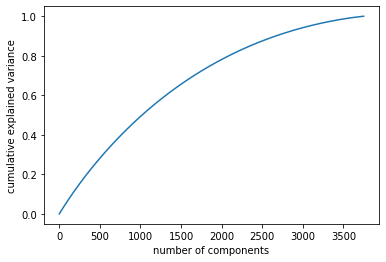

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(normalised_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 3000)
x_pca = pca.fit_transform(x_scaled)

In [31]:
sum(pca.explained_variance_ratio_)

0.9421616342341516

In [32]:
x_pca.shape

(3750, 3000)

# 4- Model Training

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pca,y, test_size=0.20, random_state=20)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3000, 3000)
(750, 3000)
(3000,)
(750,)


In [35]:
X_train

array([[-0.01952242, -4.55606064, -2.1045772 , ...,  1.62937747,
         0.94166954, -1.33250739],
       [-0.63377422, -3.12176693, -6.22650473, ..., -0.38856948,
         0.88532437, -2.13614786],
       [-2.93004397,  2.21965997, -0.11824451, ...,  0.49450439,
        -0.83956261, -1.35946385],
       ...,
       [ 1.28961649, -2.530795  , -0.6221296 , ..., -1.10298661,
        -0.61949121,  0.90175619],
       [-3.5531345 ,  0.37077297,  1.98400336, ..., -0.58414853,
         2.47114205, -0.8719491 ],
       [ 1.04076264, -2.89122948, -0.61825897, ..., -0.60684284,
         0.28932681,  1.78294432]])

### 4.1.Multiple Model using K-fold

In [36]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVM",SVC()))

In [37]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,x_pca,y, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.8797333333333333
NB 0.8981333333333333
KNN 0.8701333333333332
DT 0.8008000000000001
RF 0.8992000000000001
SVM 0.8992000000000001


[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'SVM')]

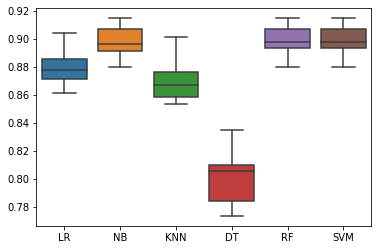

In [38]:
ax = sns.boxplot(data=results)
figsize=(16, 7)
ax.set_xticklabels(names)

### 4.2.Random Forest

using train-test split experiment to confirm.

In [39]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
pred_rf[:5]

array([1, 1, 1, 1, 1])

In [40]:
import sklearn.metrics as metrics

print('Random Forest Accuracy for test data: ', metrics.accuracy_score(y_test,pred_rf))

Random Forest Accuracy for test data:  0.884


In [ ]:
#training_scr=rf.score(X_test, y_test)
#print('Random Forest Accuracy for test data: ',training_scr)

In [41]:
training_scr=rf.score(X_train, y_train)
print('Random Forest Accuracy for training data: ',training_scr)

Random Forest Accuracy for training data:  0.9933333333333333


Our Random Forest model is over fitting. We could do more such as model tunning in trying to fix this issue.

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.33      0.01      0.02        86
           1       0.89      1.00      0.94       664

    accuracy                           0.88       750
   macro avg       0.61      0.50      0.48       750
weighted avg       0.82      0.88      0.83       750



f1 score is combination of both precision and recall. Therefore, I shall use this as metrics of evaluation. I will still take care of accuracy but, F1 score is more important in analysis.

### 4.3.Model Tune

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

In [45]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [46]:
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

In [47]:
%%time
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='f1', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.4min finished


CPU times: user 1.62 s, sys: 208 ms, total: 1.83 s
Wall time: 1min 23s


In [48]:
print(rf_grid_search.best_score_)

0.9488435344913594


In [49]:
print(rf_grid_search.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [50]:
print(rf_grid_search.best_params_)

{'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 3}


# 5-Deep Learning

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

### 5.1.Preprocessing for Neural Network

As we are not going to do any feature engineering or feature transformation for this model, preprocessing is rather simple.

In [107]:
data_xtrain=pd.read_csv('train_data.csv', header = None)
# scaling is important for neural nets else gradient exposion or diminsihing
X = StandardScaler().fit_transform(data_xtrain)

In [108]:
data_ytrain=pd.read_csv('train_labels.csv',header = None)
data_ytrain.columns = ["labels"]
data_ytrain = data_ytrain.replace(-1, 0)
data_ytrain.labels.value_counts()

1    3372
0     378
Name: labels, dtype: int64

In [109]:
print(X.shape)
print(y.shape)

(3750, 10000)
(3750,)


### 5.2.Train-test split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=20)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3000, 10000)
(750, 10000)
(3000,)
(750,)


### 5.3.Encoding target variable

In [112]:
from keras.utils import np_utils
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe=one_hot_encode_object_array(y_train)
y_test_ohe=one_hot_encode_object_array(y_test)

In [113]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(3000, 2)
(750, 2)


### 5.4.Model Building

In [114]:
#create model, add dense layers one by one specifying activation function
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], activation='relu')) # input layer requires input_dim param
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(100, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(2, activation='softmax')) # sigmoid instead of relu for final probability between 0 and 1

In [115]:
# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 300)               3000300   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [117]:
np.unique(y_train)

array([0, 1])

### 5.5.Imbalanced classes & saving computing wastage

In [118]:
# for imbalanced classes
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)
class_weights = {i : class_weights[i] for i in range(2)}

In [119]:
# call the function to fit to the data (training the network)

history=model.fit(X_train, y_train_ohe, epochs = 100, batch_size=32, 
                  validation_data=(X_test, y_test_ohe),
                  class_weight=class_weights,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=3,min_delta=0.0001)])

Epoch 1/100
94/94 [==============================] - 1s 13ms/step - loss: 0.3736 - accuracy: 0.8083 - val_loss: 0.3543 - val_accuracy: 0.9107
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.1557 - accuracy: 0.9100 - val_loss: 0.2143 - val_accuracy: 0.9240
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0576 - accuracy: 0.9710 - val_loss: 0.1943 - val_accuracy: 0.9333
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0479 - accuracy: 0.9820 - val_loss: 0.2391 - val_accuracy: 0.9267
Epoch 5/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0276 - accuracy: 0.9867 - val_loss: 0.2214 - val_accuracy: 0.9307
Epoch 6/100
94/94 [==============================] - 1s 9ms/step - loss: 0.0231 - accuracy: 0.9907 - val_loss: 0.2144 - val_accuracy: 0.9413


# 6- Evaluate Model

In [120]:
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Testing Accuracy:  0.9413
Testing Loss:  0.2144


In [121]:
y_pred_keras = model.predict(X_test)
y_pred_keras[:5]

array([[8.6477790e-08, 9.9999988e-01],
       [3.3923880e-06, 9.9999666e-01],
       [2.5497424e-09, 1.0000000e+00],
       [2.2048387e-05, 9.9997795e-01],
       [9.5887708e-07, 9.9999905e-01]], dtype=float32)

In [122]:
y_pred_keras.shape

(750, 2)

In [123]:
#convert in crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)
yhat_class_keras[:5]

array([1, 1, 1, 1, 1])

In [124]:
yhat_class_keras.shape

(750,)

In [125]:
type(yhat_class_keras)

numpy.ndarray

In [126]:
predictions=pd.DataFrame(yhat_class_keras, columns=["predictions"])
predictions.predictions.value_counts()

1    644
0    106
Name: predictions, dtype: int64

### 6.1.Classification Report

In [127]:
print(classification_report(y_test,  yhat_class_keras))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        86
           1       0.98      0.95      0.97       664

    accuracy                           0.94       750
   macro avg       0.84      0.91      0.87       750
weighted avg       0.95      0.94      0.94       750



### 6.2.confusion_matrix

In [128]:
cm = confusion_matrix(y_test,yhat_class_keras)
cm

array([[ 74,  12],
       [ 32, 632]])

In [129]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Spectral):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

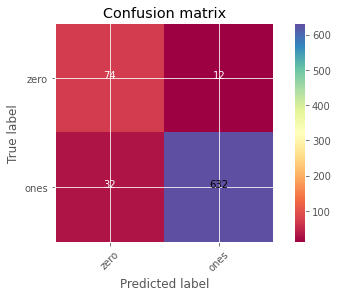

In [130]:
plot_confusion_matrix(cm, classes=['zero', 'ones'])

In [131]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

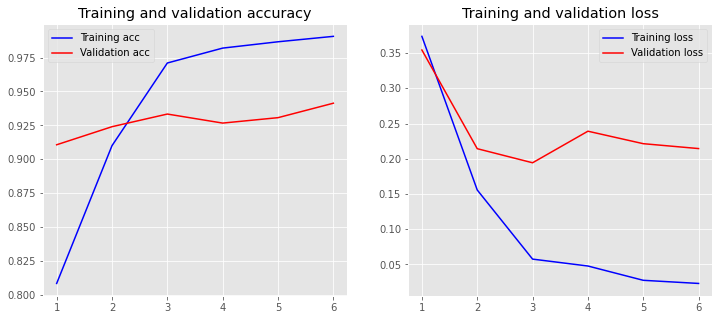

In [132]:
plot_history(history)

### 6.3. weight performance of each step

In [133]:
for w in model.get_weights():
    print(w.shape)

(10000, 300)
(300,)
(300,)
(300,)
(300,)
(300,)
(300, 200)
(200,)
(200,)
(200,)
(200,)
(200,)
(200, 100)
(100,)
(100, 2)
(2,)


In [134]:
a = model.weights
a

[<tf.Variable 'dense_4/kernel:0' shape=(10000, 300) dtype=float32, numpy=
 array([[-0.0106583 ,  0.02298548, -0.04094761, ..., -0.01004541,
         -0.00305931, -0.03775406],
        [-0.01776781, -0.02729399, -0.02993761, ..., -0.0125346 ,
          0.02739144,  0.00736289],
        [-0.00431772,  0.00620726,  0.00073144, ...,  0.02513018,
          0.00440675,  0.0132616 ],
        ...,
        [-0.01785824, -0.00717155, -0.01502667, ..., -0.03345701,
          0.0181738 , -0.00111226],
        [ 0.03332749,  0.00999994, -0.01496147, ..., -0.00850679,
          0.03069069,  0.01041354],
        [ 0.02878362,  0.00506048,  0.02910416, ...,  0.00210851,
         -0.0171661 ,  0.00138587]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(300,) dtype=float32, numpy=
 array([ 2.58071832e-02, -5.88813971e-04,  1.27541530e-03,  1.29137998e-02,
         9.60536487e-03, -7.03735929e-03,  4.32985462e-02,  3.06002740e-02,
        -3.12429946e-02,  5.70157403e-03,  2.30926927e-02, -1.408

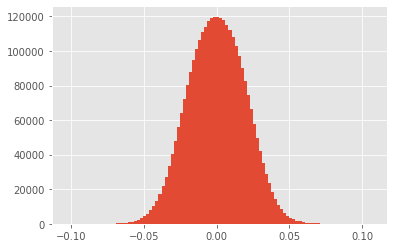

In [135]:
plt.hist(model.get_weights()[0].ravel(),100)
plt.show()

### 6.4.predict_proba

In [136]:
model.predict_proba(X_test)[0:10, :]

array([[8.6477790e-08, 9.9999988e-01],
       [3.3923880e-06, 9.9999666e-01],
       [2.5497424e-09, 1.0000000e+00],
       [2.2048387e-05, 9.9997795e-01],
       [9.5887708e-07, 9.9999905e-01],
       [3.3719188e-03, 9.9662811e-01],
       [3.4329151e-03, 9.9656701e-01],
       [6.5616639e-08, 9.9999988e-01],
       [6.9421130e-01, 3.0578864e-01],
       [8.6541127e-07, 9.9999917e-01]], dtype=float32)

Left column shows for class 0 and right for class 1

In [137]:
# for only all zeros

pred_prob_cl0 = model.predict_proba(X_test)[:, 0]
print(pred_prob_cl0[:5])

[8.6477790e-08 3.3923880e-06 2.5497424e-09 2.2048387e-05 9.5887708e-07]


In [138]:
# for all ones
pred_prob_cl1 = model.predict_proba(X_test)[:, 1]
print(pred_prob_cl0[:5])

[8.6477790e-08 3.3923880e-06 2.5497424e-09 2.2048387e-05 9.5887708e-07]


Text(0, 0.5, 'Frequency')

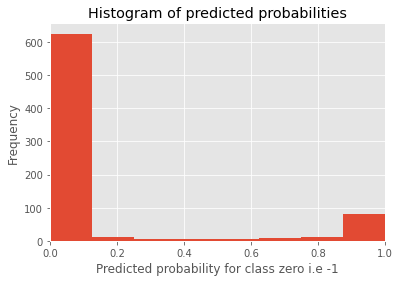

In [139]:
# histogram of predicted probabilities with zero class
plt.hist(pred_prob_cl0, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for class zero i.e -1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

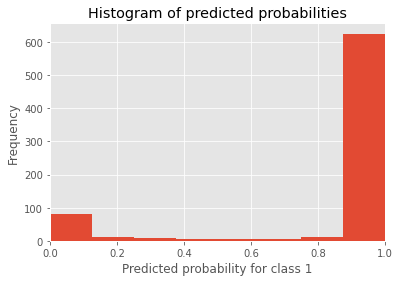

In [140]:
# histogram of predicted probabilities for class one
plt.hist(pred_prob_cl1, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for class 1')
plt.ylabel('Frequency')

### 6.5.ROC curve

In [141]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl1)

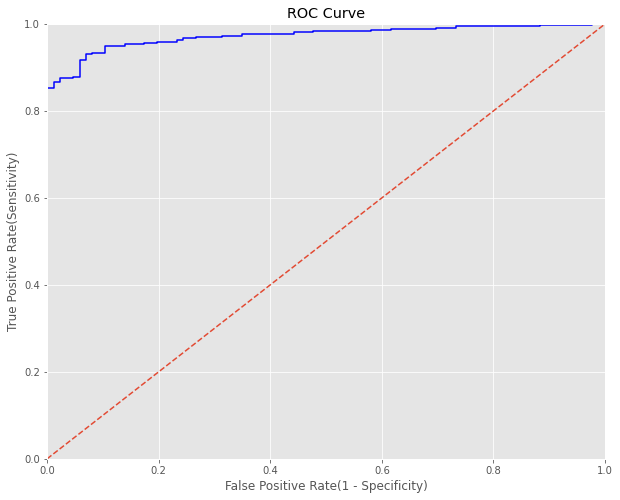

In [142]:
# Representing roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl1)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

### 6.6.AUC

In [143]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9726463995516952

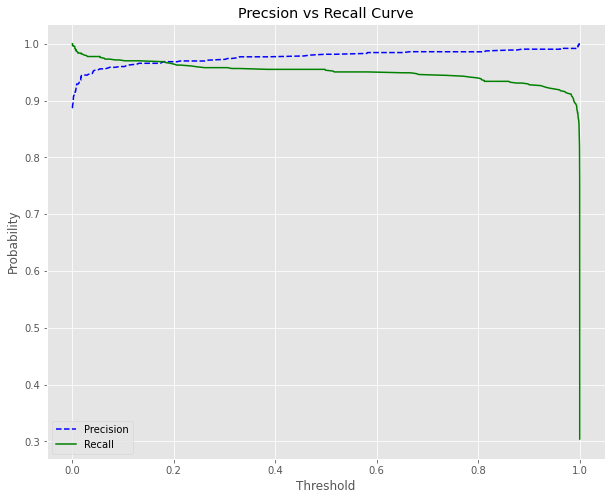

In [144]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl1)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

Ideally, we get threshold point at 0.5 where both sensitivity and precision cross each other. In our case, it is 0.6 slightly higher than what we should have. It slightly gives a hint that our model has few values that are making it tough to provide good and precise prediction.

# 7-Submission

In [146]:
data_xtest.shape

(1249, 10000)

In [147]:
# scale dataset before feedling to trained model
X = StandardScaler().fit_transform(data_xtest)
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
normalised_X = pd.DataFrame(X,columns=feat_cols)
normalised_X.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature9960,feature9961,feature9962,feature9963,feature9964,feature9965,feature9966,feature9967,feature9968,feature9969,feature9970,feature9971,feature9972,feature9973,feature9974,feature9975,feature9976,feature9977,feature9978,feature9979,feature9980,feature9981,feature9982,feature9983,feature9984,feature9985,feature9986,feature9987,feature9988,feature9989,feature9990,feature9991,feature9992,feature9993,feature9994,feature9995,feature9996,feature9997,feature9998,feature9999
0,0.609241,1.791523,-2.124618,0.089341,-1.490476,0.300628,0.280798,-0.051802,0.543903,1.020866,0.758481,1.230090,-0.034555,0.304648,-1.257635,-1.515956,0.221911,-0.097428,-1.132751,-0.289703,-0.610075,-0.088000,-1.196245,0.258591,-1.078973,-0.939290,0.324663,-0.381568,0.422937,-0.953295,1.635312,-0.213829,0.364581,-0.439720,0.165975,-0.322932,0.543143,0.928159,-1.523605,-0.095267,...,-1.514063,0.079445,-0.086947,0.367580,-0.191756,-0.521538,1.168903,-1.082200,-2.129798,-1.215281,0.402686,-1.048920,-0.328617,-0.365431,-0.561243,-1.031511,2.010831,0.701080,0.384435,-0.906463,-0.751875,-0.175465,-0.022051,-1.359747,-0.884548,2.266538,-2.390067,-1.389986,-0.290962,0.163927,0.284293,1.777492,1.401481,1.123118,0.021320,-0.990453,-1.404056,0.718724,0.543282,1.128538
1,0.350695,-0.079477,-0.113209,0.233827,-1.929552,1.137443,-2.022092,-0.755574,0.542303,1.162112,1.144891,0.513112,-0.189065,0.736800,0.434848,1.042218,-1.246078,1.367979,1.026694,-1.696331,1.434243,2.414885,-1.342808,1.440166,0.722062,0.294577,-0.054545,0.493026,0.003588,-0.247717,0.255564,0.270762,0.879510,-0.670353,-1.124226,-0.667338,-0.253520,-0.088068,-0.211389,-0.947371,...,0.046600,-1.469398,1.138766,0.001018,-1.701311,0.181133,-0.346379,-1.463818,0.544086,1.980021,0.014140,-0.717164,-0.624440,0.736866,-0.368226,-0.027634,0.984786,2.069492,-0.701734,0.710441,0.402867,0.428069,-1.585430,1.287426,-0.636853,1.255374,0.170104,1.550260,-0.328608,-0.979304,1.699328,1.354172,0.272291,-0.742914,1.114312,0.284432,-1.930375,-0.029640,0.284530,-1.062560
2,0.897408,0.290021,0.638809,0.224324,0.267653,0.963186,0.803766,0.645222,0.474120,-0.208843,0.480842,-1.171023,0.325174,-0.148305,0.781168,0.113667,0.480136,1.046859,0.178262,1.075303,-1.064226,-0.716500,1.211141,-1.350039,0.121910,0.411985,-0.747976,-1.432455,-0.149261,-1.335696,0.772431,0.048835,0.847192,-0.758900,0.759773,1.050580,-0.662712,1.080294,0.333076,-1.459593,...,-0.086820,1.841755,-0.323763,1.592930,-0.842275,-0.851236,-0.760001,-0.032111,-0.153763,1.813807,-0.434114,0.406675,0.247653,0.288009,-0.012232,-0.641177,1.333343,0.627288,0.034753,0.665436,1.057062,0.531266,1.030726,-0.120858,1.694031,-0.746167,0.344681,-1.048722,-0.618441,0.442976,0.358727,-0.465102,0.391801,-0.813890,-0.941513,0.500306,-0.628662,-1.802578,-0.335758,-0.424276
3,-1.487576,-0.033788,-0.713361,-0.486103,-0.845678,0.448922,-1.354754,0.392132,-1.015016,-0.449145,0.334241,-1.103807,-0.768968,-0.823377,1.153276,0.893693,0.977604,-0.800082,0.133665,0.937275,-2.271658,-1.014991,0.358883,1.917911,-0.133671,0.229454,0.013314,0.607107,0.763760,-0.793197,-0.489704,-0.915339,-0.049294,-1.329794,-0.297205,-1.451943,-1.223803,-0.620634,-0.499708,0.136986,...,0.736075,1.087787,0.018529,-0.946620,-0.082230,-0.709774,1.759294,0.980128,0.617693,-0.539467,-0.012215,-0.428488,-0.071978,-0.328770,-1.855722,-0.405231,-0.278094,-1.199656,-1.003045,-0.227228,0.723312,1.630522,0.184133,0.812790,0.258268,-0.073682,0.405199,0.157176,-0.421661,0.489899,0.113712,-1.170251,0.161155,0.299066,-1.347567,-0.837667,1.128186,0.337662,-0.282765,-0.624844
4,-0.733768,-0.523177,-1.790395,0.328341,0.755217,-0.336479,1.

In [155]:
# use model.predict()
y_pred_keras = model.predict(X)
prediction_df=pd.DataFrame(y_pred_keras)

In [149]:
# convert to crisp class
yhat_class_keras = model.predict_classes(X_test, verbose=0)
yhat_class_keras[:5]

array([1, 1, 1, 1, 1])

In [150]:
prediction_df=pd.DataFrame(y_pred_keras)
pred_value_class=prediction_df.max(axis=1)
pred_value_class.head()

0    0.998719
1    0.998723
2    0.998717
3    0.998716
4    0.998712
dtype: float32

In [151]:
predictions=pd.DataFrame(yhat_class_keras, columns=["pred_class"])
predictions["pred_class"] = predictions.pred_class.replace(0, -1)
predictions["Probability"]=pred_value_class
predictions.head()

,pred_class,Probability
0,1,0.998719
1,1,0.998723
2,1,0.998717
3,1,0.998716
4,1,0.998712


In [152]:
predictions.pred_class.value_counts()

 1    644
-1    106
Name: pred_class, dtype: int64

In [161]:
# as per instructions, I only need to submit labels of test classes and not their probability value.
y_test_label=predictions.pred_class
y_test_label=pd.DataFrame(y_test_label, columns=["pred_class"])

 1    644
-1    106
Name: pred_class, dtype: int64

In [162]:
# save this as test_labels.csv file
y_test_label.to_csv('test_labels.csv', index=False)

In [163]:
result_check = pd.read_csv("test_labels.csv")
result_check.head()

,pred_class
0,1
1,1
2,1
3,1
4,1
